# Red de Similitud de Canciones de Taylor Swift

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('taylor_swift_lyrics.csv', encoding='ISO-8859-1')

Normalizamos los nombres de los álbumes en el dataframe

In [7]:
df['album'] = df['album'].str.lower()

Combinamos las letras de cada canción en una sola cadena de texto por canción y por álbum

In [8]:
df_combined = df.groupby(['album', 'track_title'])['lyric'].apply(' '.join).reset_index()

Normalizamos los nombres de los álbumes en el dataframe combinado

In [9]:
df_combined['album'] = df_combined['album'].str.lower()

Usamos CountVectorizer para convertir la colección de textos de las letras a una matriz de recuentos de tokens

In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_combined['lyric'])

Calculamos la similitud del coseno entre las canciones


In [11]:
cosine_sim = cosine_similarity(X)

### Gráfica

Definición de los colores de los nodos que irán en el gráfico según el álbum, claves normalizadas a minúsculas


In [12]:
album_colors_map = {
    'taylor swift': 'green',
    'fearless': 'yellow',
    'speak now': 'purple',
    'red': 'red',
    '1989': 'darkblue',
    'reputation': 'black'
}

Inicializamos la gráfica de red con NetworkX

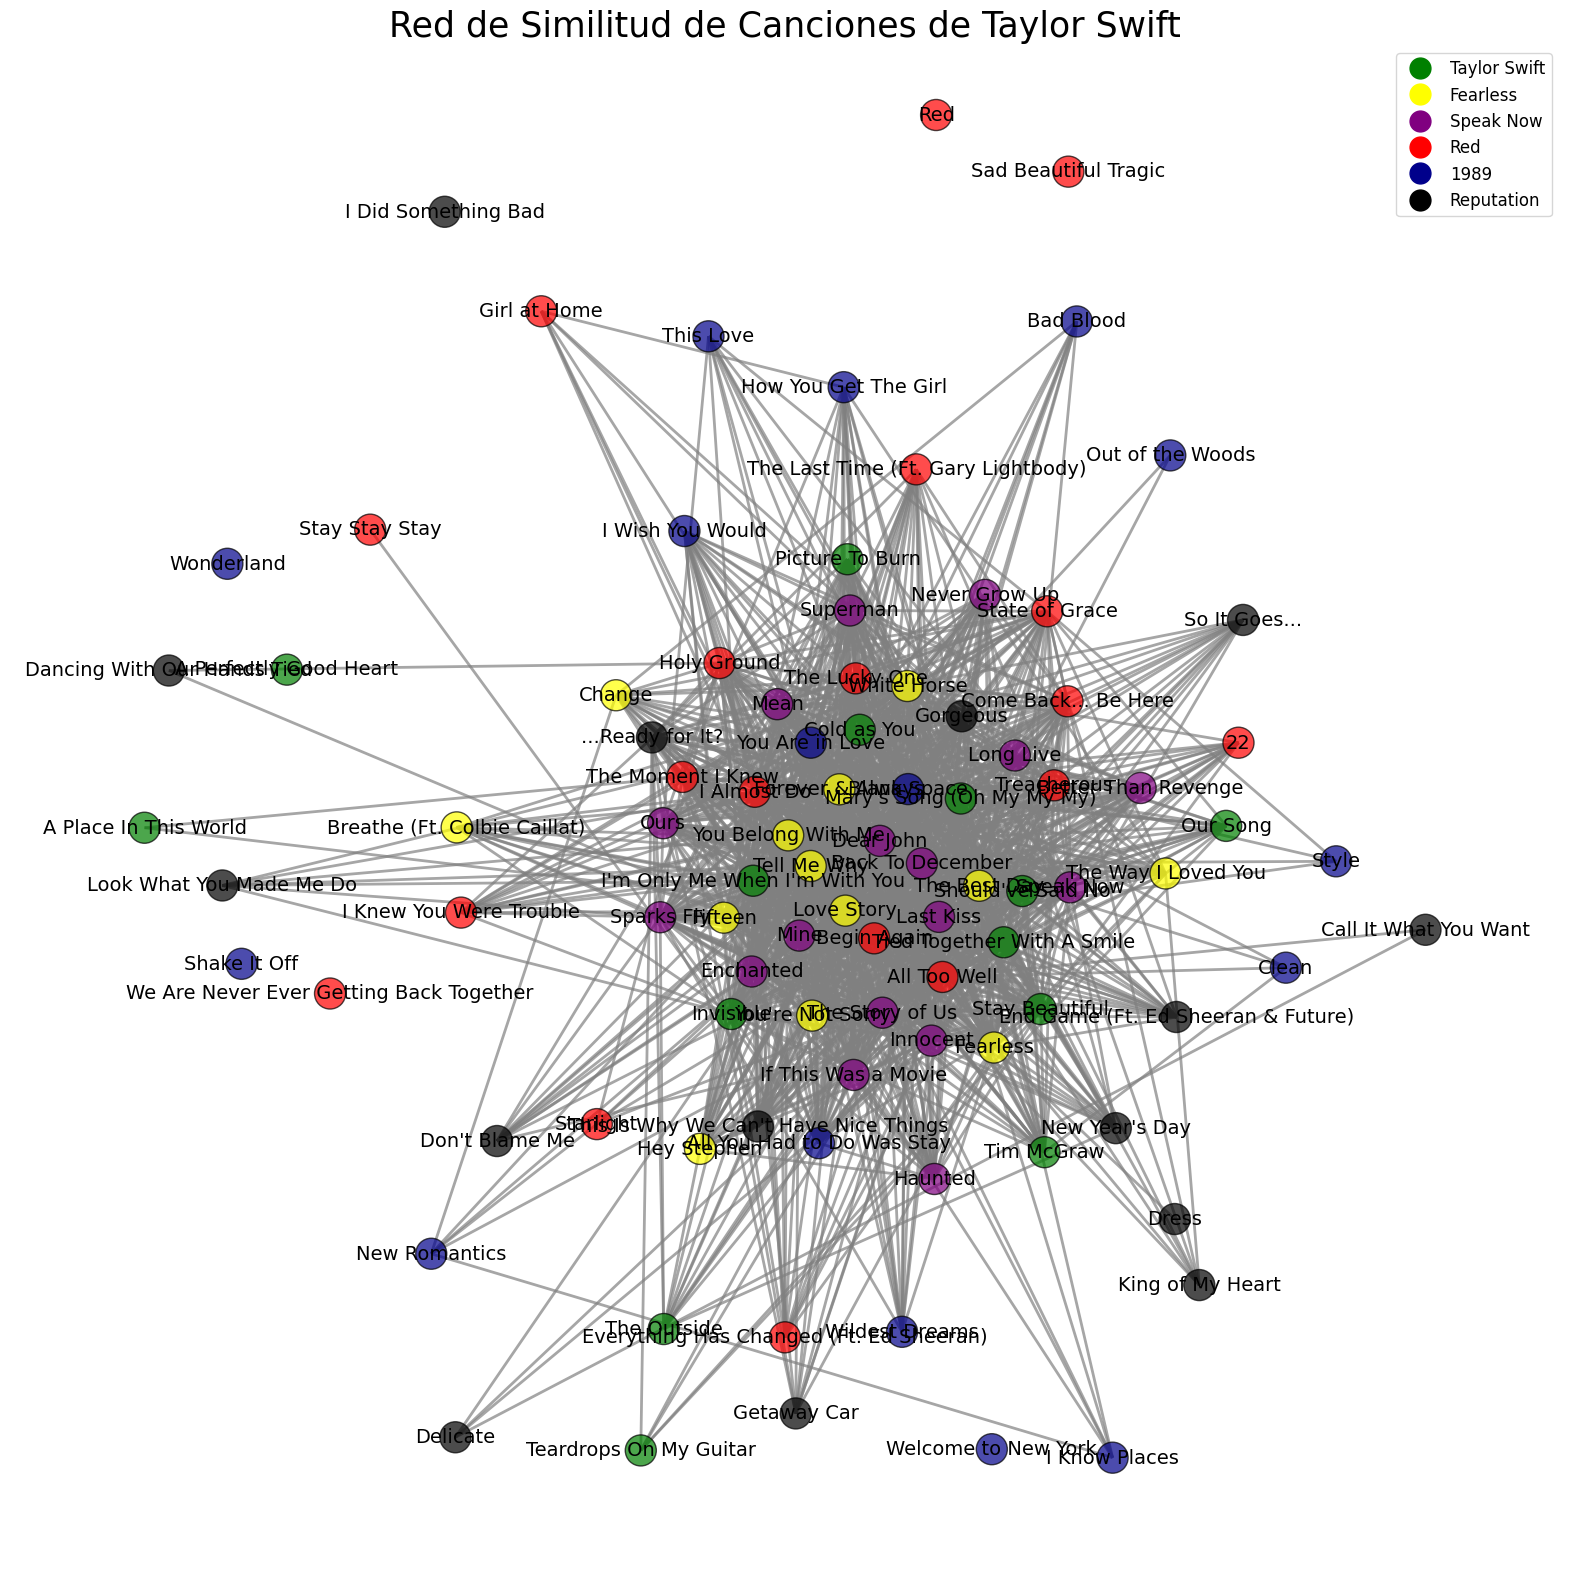

In [13]:
G = nx.Graph()

# Añadimos los nodos al gráfico
for index, row in df_combined.iterrows():
    G.add_node(row['track_title'], album=row['album'])

# Añadimos las aristas al gráfico basadas en la similitud del coseno
threshold = 0.5  # Umbral para considerar una conexión significativa
for i in range(cosine_sim.shape[0]):
    for j in range(i+1, cosine_sim.shape[1]):
        if cosine_sim[i, j] > threshold:
            G.add_edge(df_combined['track_title'][i], df_combined['track_title'][j], weight=cosine_sim[i, j])

# Dibujamos el gráfico de red con colores específicos para cada álbum
fig, ax = plt.subplots(figsize=(20, 20))  # Tamaño ampliado
pos = nx.spring_layout(G, k=0.50, iterations=20)  # Aumentar el espacio entre los nodos
nx.draw_networkx_nodes(G, pos, node_color=[album_colors_map[row['album']] for index, row in df_combined.iterrows()], edgecolors='k', node_size=500, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=14)
nx.draw_networkx_edges(G, pos, edge_color='grey', width=2.0, alpha=0.7)

# Declaración de leyenda para interpretar los colores de los nodos
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=album.title(), markersize=15, linestyle='None') for album, color in album_colors_map.items()]
ax.legend(handles=legend_elements, loc='best', fontsize='large')

# Mejoramos la estética y lo guardamos
ax.set_title('Red de Similitud de Canciones de Taylor Swift', size=25)
plt.axis('off')
plt.savefig('taylor_swift_song_similarity_network.png', dpi=300)  # dpi aumentado para mayor claridad
plt.show()
